=== MODELLO LINEARE ===
R^2 Test: 0.8484
MAE Test: 9046.1232


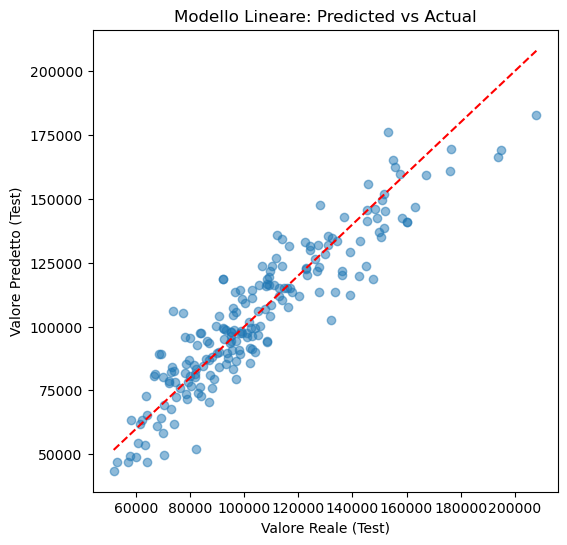


Ecco i primi 5 bond di simulazione con i valori previsti dal modello LINEARE:
   Unnamed: 0 credit_rating  debt_to_equity  energy_capacity  esg_rating  \
0        1000            BB        0.925015        49.981000   20.775856   
1        1001            AA        2.404028        29.555073   90.184009   
2        1002           BBB        2.008619         9.684890   94.957444   
3        1003           AAA        2.789894        20.601847   78.535606   
4        1004           CCC        0.448415        32.440513    4.152142   

          region  predicted_bond_value  
0         Europe              150016.0  
1  North America              121344.0  
2  North America              126720.0  
3         Europe              114688.0  
4         Europe               90624.0  


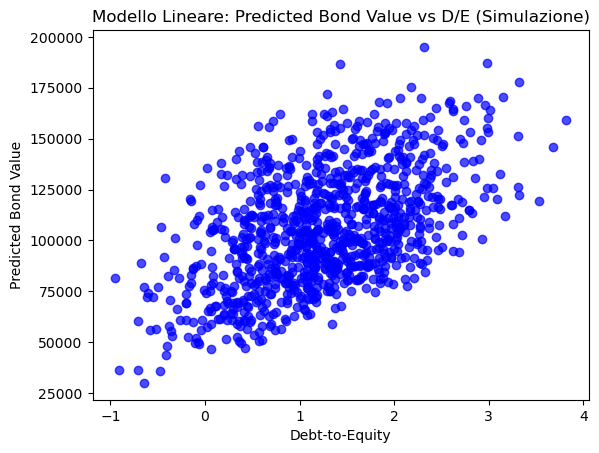

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score


file_hist = "/Users/tommasomarrucci/Documents/GitHub/YALE/historical_bonds.csv"
df_hist = pd.read_csv(file_hist)

r = 0.05
df_hist['bond_value'] = (
    df_hist['cash_flow_1'] / (1 + r)**1 +
    df_hist['cash_flow_2'] / (1 + r)**2 +
    df_hist['cash_flow_3'] / (1 + r)**3
)

features = ['credit_rating', 'debt_to_equity', 'energy_capacity', 'region', 'esg_rating']
X = df_hist[features]
y = df_hist['bond_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = ['debt_to_equity', 'energy_capacity', 'esg_rating']
categorical_features = ['credit_rating', 'region']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

linear_model = LinearRegression()

pipeline_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', linear_model)
])


pipeline_linear.fit(X_train, y_train)


y_pred_test = pipeline_linear.predict(X_test)
r2_lin = r2_score(y_test, y_pred_test)
mae_lin = mean_absolute_error(y_test, y_pred_test)

print("=== MODELLO LINEARE ===")
print(f"R^2 Test: {r2_lin:.4f}")
print(f"MAE Test: {mae_lin:.4f}")

# Plot Pred vs Actual (solo sul test set)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valore Reale (Test)")
plt.ylabel("Valore Predetto (Test)")
plt.title("Modello Lineare: Predicted vs Actual")
plt.show()


file_sim = "/Users/tommasomarrucci/Documents/GitHub/YALE/simulation_bonds.csv"
df_sim = pd.read_csv(file_sim)

df_sim['predicted_bond_value'] = pipeline_linear.predict(df_sim[features])

print("\nEcco i primi 5 bond di simulazione con i valori previsti dal modello LINEARE:")
print(df_sim.head())

df_sim.to_csv("simulation_bonds_linear_pred.csv", index=False)

plt.figure()
plt.scatter(df_sim['debt_to_equity'], df_sim['predicted_bond_value'], alpha=0.7, color='blue')
plt.xlabel('Debt-to-Equity')
plt.ylabel('Predicted Bond Value')
plt.title('Modello Lineare: Predicted Bond Value vs D/E (Simulazione)')
plt.show()
